# Multiple Linear Regression: House Price Prediction

In this lab I will predict house prices by house sizes and number of bedrooms, number of bathrooms, number of floors, and furnishing status. I will use the Multiple Linear Regression model to predict house prices. I will use the dataset from the following link: [Housing Prices Dataset](https://www.kaggle.com/datasets/yasserh/housing-prices-dataset)

In [16]:
# Load the training data

import csv
import numpy as np

with open("../datasets/housing.csv") as f:
    reader = csv.reader(f)
    header = next(reader)
    data = list(reader)
    
    x_size_max = max(float(x[1]) for x in data)
    x_bedrooms_max = max(float(x[2]) for x in data)
    x_bathrooms_max = max(float(x[3]) for x in data)
    x_floors_max = max(float(x[4]) for x in data)
    y_price_max = max(float(y[0]) for y in data)
    
    X_train = np.array([[
        float(x[1]) / x_size_max,           # Size (sqft) - scaled to 0-1
        float(x[2]) / x_bedrooms_max,       # Bedrooms - scaled to 0-1
        float(x[3]) / x_bathrooms_max,      # Bathrooms - scaled to 0-1
        float(x[4]) / x_floors_max,         # Floors - scaled to 0-1
        1. if x[12] == "furnished" else .0  # Furnished - 0 or 1
        ] for x in data], dtype=np.float64)
    y_train = np.array([float(y[0]) / 10_000_000 for y in data], dtype=np.float64)  # Price (USD) - scaled to 0-1
    print("X_train:", X_train[:5])
    print("y_train:", y_train[:5])

X_train: [[0.45802469 0.66666667 0.5        0.75       1.        ]
 [0.55308642 0.66666667 1.         1.         1.        ]
 [0.61481481 0.5        0.5        0.5        0.        ]
 [0.46296296 0.66666667 0.5        0.5        1.        ]
 [0.45802469 0.66666667 0.25       0.5        1.        ]]
y_train: [1.33   1.225  1.225  1.2215 1.141 ]


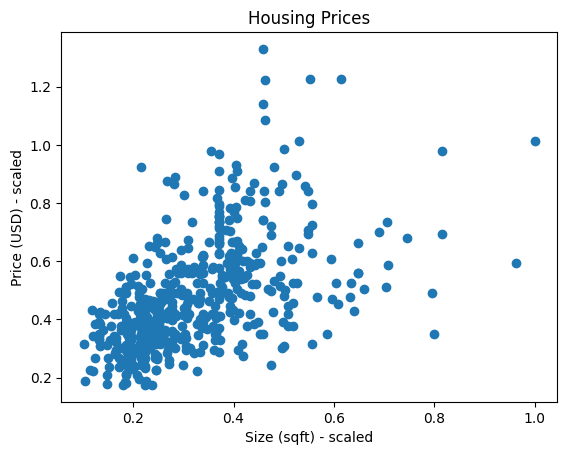

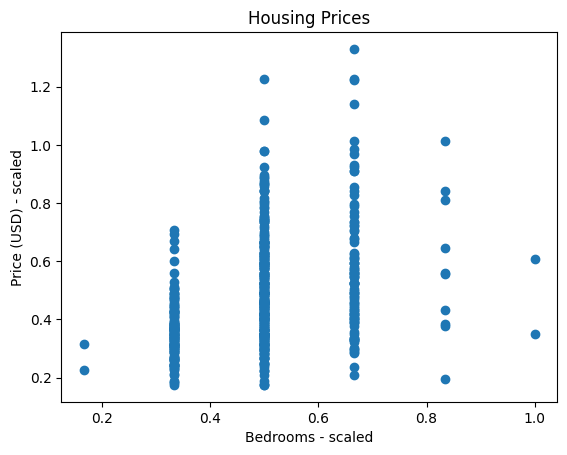

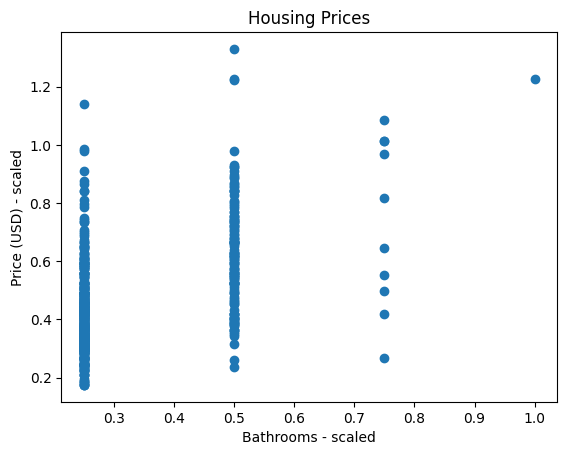

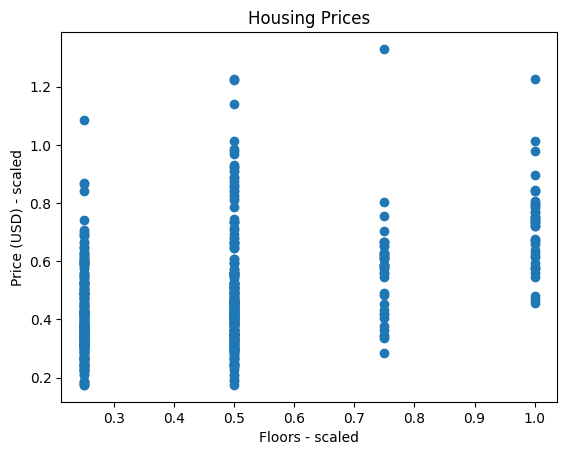

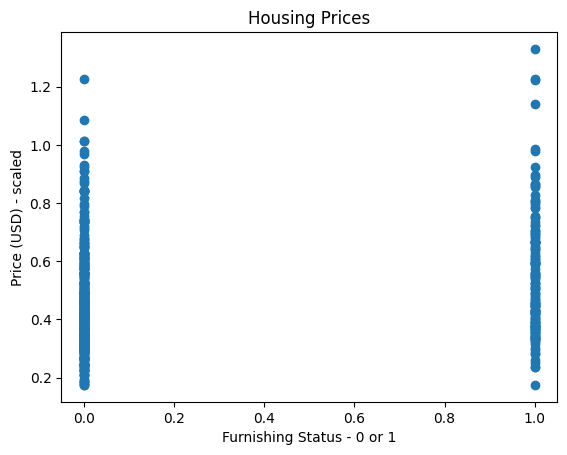

In [17]:
# Plot the training data: house size vs price

import matplotlib.pyplot as plt

x_train_size = X_train[:, 0]
plt.scatter(x_train_size, y_train)
plt.title("Housing Prices")
plt.xlabel("Size (sqft) - scaled")
plt.ylabel("Price (USD) - scaled")   
plt.show()

x_train_bedrooms = X_train[:, 1]
plt.scatter(x_train_bedrooms, y_train)
plt.title("Housing Prices")
plt.xlabel("Bedrooms - scaled")
plt.ylabel("Price (USD) - scaled")
plt.show()

x_train_bathrooms = X_train[:, 2]
plt.scatter(x_train_bathrooms, y_train)
plt.title("Housing Prices")
plt.xlabel("Bathrooms - scaled")
plt.ylabel("Price (USD) - scaled")
plt.show()

x_train_floors = X_train[:, 3]
plt.scatter(x_train_floors, y_train)
plt.title("Housing Prices")
plt.xlabel("Floors - scaled")
plt.ylabel("Price (USD) - scaled")
plt.show()

x_train_furnishingstatus = X_train[:, 4]
plt.scatter(x_train_furnishingstatus, y_train)
plt.title("Housing Prices")
plt.xlabel("Furnishing Status - 0 or 1")
plt.ylabel("Price (USD) - scaled")
plt.show()

In [18]:
# Number of training examples

m = X_train.shape[0]
print("m:", m)

del m

m: 545


In [19]:
# Define the model (hypothesis) function

def predict(X: np.ndarray, w: np.ndarray, b: float) -> np.ndarray:
    """
    Linear prediction function.

    Args:
        X (ndarray): Feature matrix (m x n)
        w (ndarray): Weight vector (n,)
        b (float): Bias term
    
    Returns:
        ndarray: Predictions (m,)
    """
    return np.dot(X, w) + b

# Please note: sometimes h(x, w, b) is used
# to represent the hypothesis function

# Example values
w = np.array([.5, .5, .5, .5, .5], dtype=np.float64)  # weights (slopes)
b: float = .0  # bias (y-intercept)

# Predictions for the first 5 training sets
print("y-predicts:", predict(X_train[:5], w, b))

del w, b

y-predicts: [1.68734568 2.10987654 1.05740741 1.56481481 1.43734568]


In [20]:
# Compute the gradient for linear regression

import time

# Example values
w = np.array([.5, .5, .5, .5, .5], dtype=np.float64)  # weights (slopes)
b: float = .0  # bias (y-intercept)

def compute_gradient(X_train: np.ndarray, y_train: np.ndarray, w: np.ndarray, b: float) -> (np.ndarray, float):
    """
    Compute the gradient for multiple linear regression.

    Args:
        X_train (ndarray): Feature matrix (m x n)
        y_train (ndarray): Target vector (m,)
        w (ndarray): Weight vector (n,)
        b (float): Bias term

    Returns:
        (ndarray, float): Gradient w.r.t. weights and bias
    """
    m, n = X_train.shape  # m: number of examples, n: number of features
    predictions = predict(X_train, w, b)
    errors = predictions - y_train

    dw = np.dot(X_train.T, errors) / m  # Vectorized gradient for weights
    db = np.sum(errors) / m  # Gradient for bias

    return dw, db

start = time.time()
dw, db = compute_gradient(X_train, y_train, w, b)
print("Time:", time.time() - start)

print("dw:", dw)
print("db:", db)

del w, b, dw, db, start

Time: 0.0001380443572998047
dw: [0.14516474 0.23039699 0.15051662 0.22248708 0.20461186]
db: 0.44429745692603917


In [21]:
# Loss function (Mean Squared Error)

# Example values
w = np.array([.5, .5, .5, .5, .5], dtype=np.float64)  # weights (slopes)
b: float = .0  # bias (y-intercept)

# Loss function for multiple training examples
def compute_loss(X_train: np.ndarray, y_train: np.ndarray, w: np.ndarray, b: float) -> float:
    """
    Compute the mean squared error loss.

    Args:
        X_train (ndarray): Feature matrix (m x n)
        y_train (ndarray): Target vector (m,)
        w (ndarray): Weight vector (n,)
        b (float): Bias term
    
    Returns:
        float: Loss value
    """
    m = X_train.shape[0]
    predictions = predict(X_train, w, b)
    return np.sum((predictions - y_train) ** 2) / (2 * m)

print("Loss:", compute_loss(X_train, y_train, w, b))

del w, b

Loss: 0.13243243928545953


## Putting it all together

In [22]:
def min_j(
    X_train: np.ndarray,
    y_train: np.ndarray,
    w_init: np.ndarray,
    b_init: float,
    learning_rate: float,
    max_iterations=1_000_000,
    loss_diff_threshold=1e-12,
    print_step=100,
):
    """
    Performs gradient descent to minimize the cost function J.

    Parameters:
    - X_train: numpy array of input features.
    - y_train: numpy array of target values.
    - w_init: initial weights (slope).
    - b_init: initial bias (intercept).
    - learning_rate: learning rate for gradient descent.
    - max_iterations: maximum number of iterations.
    - loss_diff_threshold: threshold for the change in loss to determine convergence.

    Returns:
    - w: optimized weights.
    - b: optimized bias.
    - w_history: list of weights over iterations.
    - b_history: list of biases over iterations.
    - loss_history: list of loss values over iterations.
    """
    w = np.array(w_init, dtype=np.float64)
    b = float(b_init)

    # Lists to store the values for plotting
    w_history = []
    b_history = []
    loss_history = []

    prev_loss = float("inf")
    for i in range(max_iterations):
        # Compute gradients
        dw, db = compute_gradient(X_train, y_train, w, b)

        # Update parameters
        w -= learning_rate * dw
        b -= learning_rate * db

        # Compute loss
        loss = compute_loss(X_train, y_train, w, b)

        # Store values
        w_history.append(w.copy())
        b_history.append(b)
        loss_history.append(loss)

        # Early stopping
        iteration = i + 1
        loss_diff = prev_loss - loss
        if loss_diff < loss_diff_threshold and loss_diff >= 0:
            print(
                f"Loss diff {loss_diff} < {loss_diff_threshold}, breaking at iteration {iteration}, with Loss = {loss}"
            )
            break

        # Print progress
        if iteration % print_step == 0 or iteration == 1:
            print(
                f"Iteration {iteration}: loss = {loss:.6f}, w = {w}, b = {b:.6f}, loss_diff = {loss_diff:.6f}"
            )

        # Update previous loss
        prev_loss = loss

    return w, b, w_history, b_history, loss_history

In [23]:
# Compute the optimal weight and bias

w, b, w_history, b_history, loss_history = min_j(
    X_train=X_train,
    y_train=y_train,
    w_init=np.zeros(X_train.shape[1]),
    b_init=0,
    learning_rate=.6,
)

num_iterations = len(w_history)

Iteration 1: loss = 0.012454, w = [0.09897378 0.14639026 0.09925002 0.13931615 0.08470431], b = 0.286004, loss_diff = inf
Iteration 100: loss = 0.008476, w = [0.40796561 0.1461016  0.31337362 0.21971729 0.05540821], b = 0.062293, loss_diff = 0.000011
Iteration 200: loss = 0.008006, w = [0.52895682 0.13876891 0.40148913 0.2154285  0.04857382], b = 0.001644, loss_diff = 0.000002
Iteration 300: loss = 0.007938, w = [0.5730589  0.13142476 0.43899256 0.21045479 0.04610298], b = -0.018288, loss_diff = 0.000000
Iteration 400: loss = 0.007927, w = [0.58882651 0.1260291  0.45564953 0.20837251 0.04518494], b = -0.024938, loss_diff = 0.000000
Iteration 500: loss = 0.007925, w = [0.59436131 0.12244546 0.46333282 0.2076461  0.04483989], b = -0.027023, loss_diff = 0.000000
Iteration 600: loss = 0.007925, w = [0.59625424 0.12018122 0.46700859 0.20743201 0.0447089 ], b = -0.027572, loss_diff = 0.000000
Iteration 700: loss = 0.007925, w = [0.59687445 0.11879163 0.46882848 0.20739271 0.04465853], b = -0

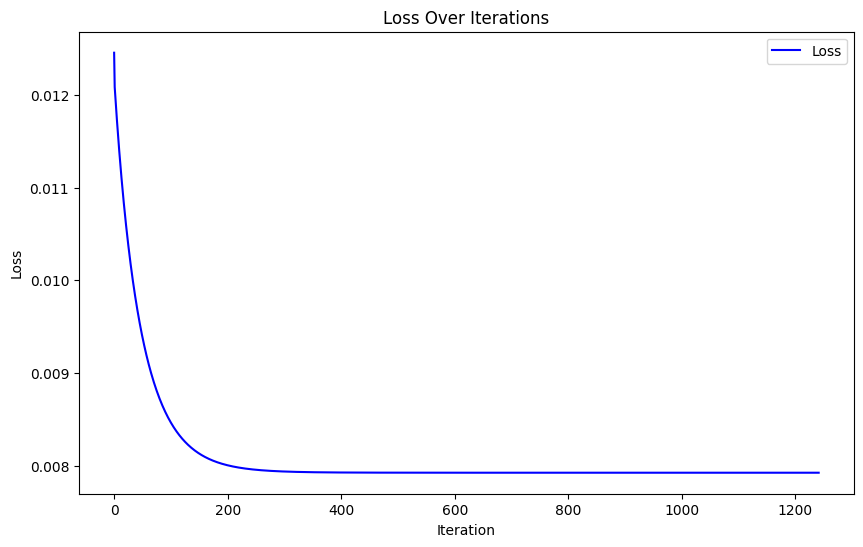

In [24]:
# Plot the Loss Over Iterations

plt.figure(figsize=(10, 6))
plt.plot(range(num_iterations), loss_history, 'b-', label='Loss')
plt.title('Loss Over Iterations')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.legend()
plt.show()

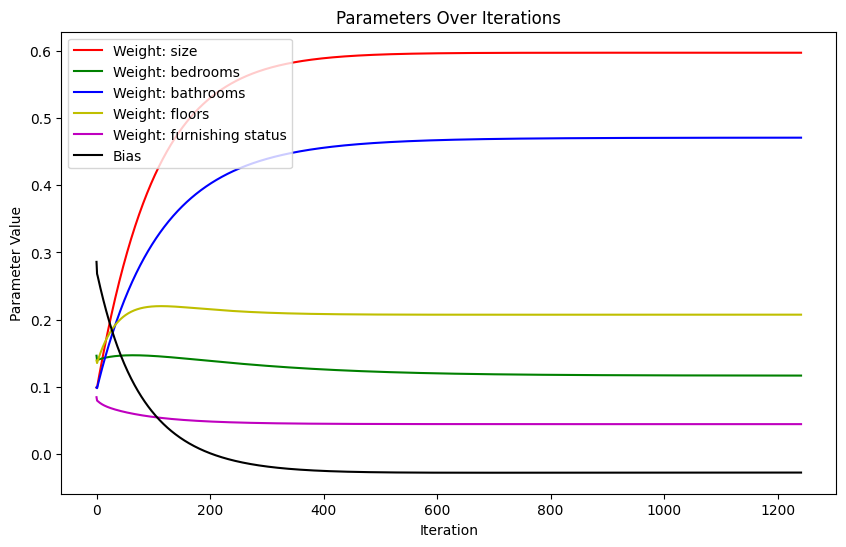

In [25]:
# Plot Parameters Over Iterations

plt.figure(figsize=(10, 6))
# Weight w.r.t. size
plt.plot(range(num_iterations), [w[0] for w in w_history], 'r-', label='Weight: size')
# Weight w.r.t. bedrooms
plt.plot(range(num_iterations), [w[1] for w in w_history], 'g-', label='Weight: bedrooms')
# Weight w.r.t. bathrooms
plt.plot(range(num_iterations), [w[2] for w in w_history], 'b-', label='Weight: bathrooms')
# Weight w.r.t. floors
plt.plot(range(num_iterations), [w[3] for w in w_history], 'y-', label='Weight: floors')
# Weight w.r.t. furnishing status
plt.plot(range(num_iterations), [w[4] for w in w_history], 'm-', label='Weight: furnishing status')
plt.plot(range(num_iterations), b_history, 'k-', label='Bias')
plt.title('Parameters Over Iterations')
plt.xlabel('Iteration')
plt.ylabel('Parameter Value')
plt.legend()
plt.show()

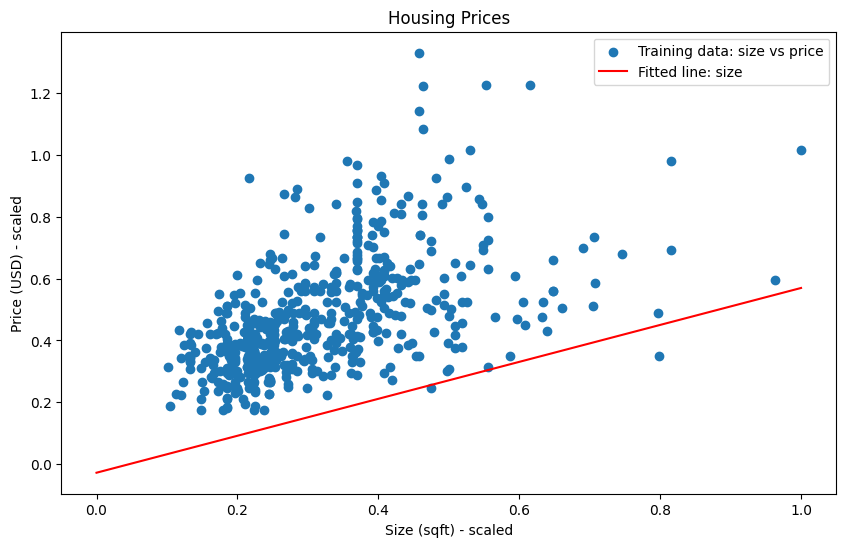

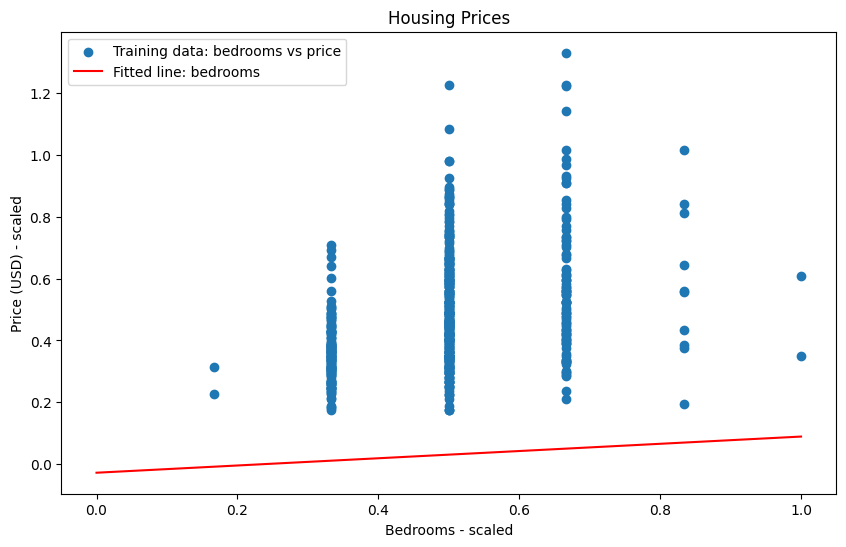

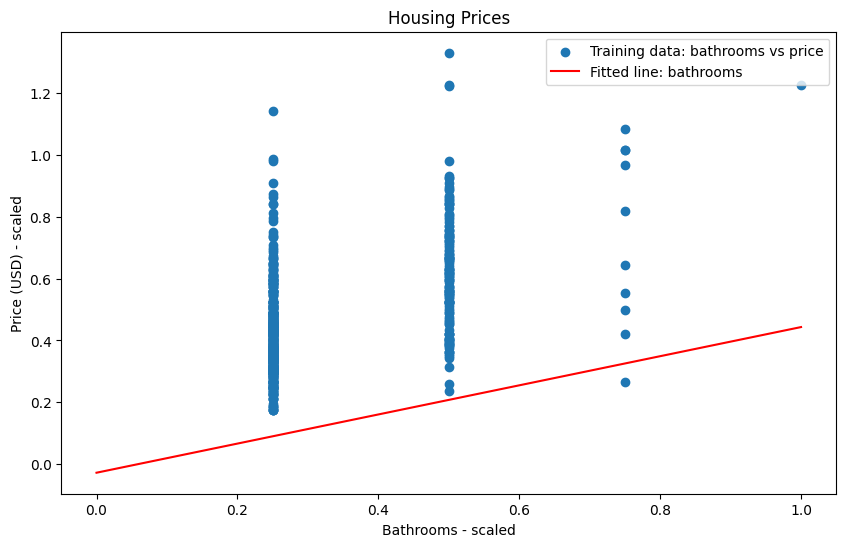

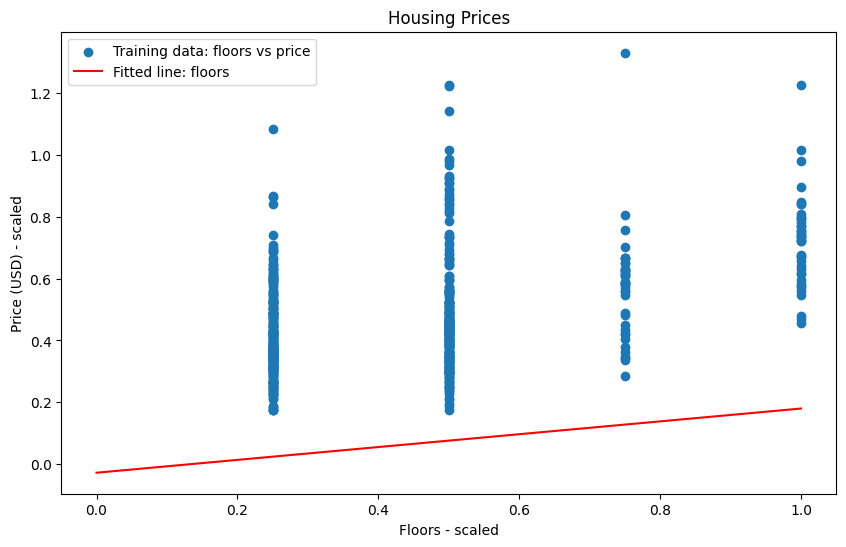

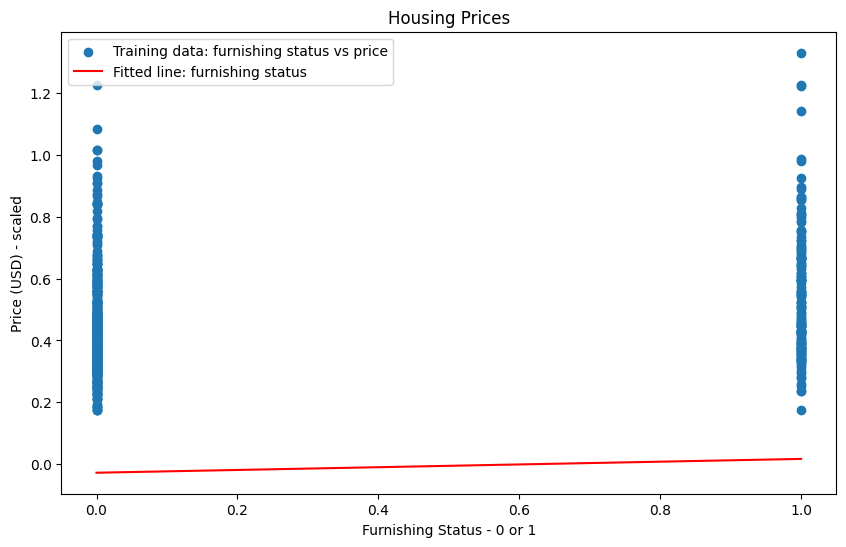

In [26]:
# Visualize Fitted Line on Data

# Plot the training data: house size vs price
plt.figure(figsize=(10, 6))
x_train_size = X_train[:, 0]
plt.scatter(x_train_size, y_train, label='Training data: size vs price')
plt.title('Housing Prices')
plt.xlabel('Size (sqft) - scaled')
plt.ylabel('Price (USD) - scaled')

# Plot the fitted line: size
x_line = np.linspace(0, 1, 100)
y_line = w[0] * x_line + b
plt.plot(x_line, y_line, 'r-', label='Fitted line: size')
plt.legend()
plt.show()

# Plot the training data: house bedrooms vs price
plt.figure(figsize=(10, 6))
x_train_bedrooms = X_train[:, 1]
plt.scatter(x_train_bedrooms, y_train, label='Training data: bedrooms vs price')
plt.title('Housing Prices')
plt.xlabel('Bedrooms - scaled')
plt.ylabel('Price (USD) - scaled')

# Plot the fitted line: bedrooms
x_line = np.linspace(0, 1, 100)
y_line = w[1] * x_line + b
plt.plot(x_line, y_line, 'r-', label='Fitted line: bedrooms')
plt.legend()
plt.show()

# Plot the training data: house bathrooms vs price
plt.figure(figsize=(10, 6))
x_train_bathrooms = X_train[:, 2]
plt.scatter(x_train_bathrooms, y_train, label='Training data: bathrooms vs price')
plt.title('Housing Prices')
plt.xlabel('Bathrooms - scaled')
plt.ylabel('Price (USD) - scaled')

# Plot the fitted line: bathrooms
x_line = np.linspace(0, 1, 100)
y_line = w[2] * x_line + b
plt.plot(x_line, y_line, 'r-', label='Fitted line: bathrooms')
plt.legend()
plt.show()

# Plot the training data: house floors vs price
plt.figure(figsize=(10, 6))
x_train_floors = X_train[:, 3]
plt.scatter(x_train_floors, y_train, label='Training data: floors vs price')
plt.title('Housing Prices')
plt.xlabel('Floors - scaled')
plt.ylabel('Price (USD) - scaled')

# Plot the fitted line: floors
x_line = np.linspace(0, 1, 100)
y_line = w[3] * x_line + b
plt.plot(x_line, y_line, 'r-', label='Fitted line: floors')
plt.legend()
plt.show()

# Plot the training data: house furnishing status vs price
plt.figure(figsize=(10, 6))
x_train_furnishingstatus = X_train[:, 4]
plt.scatter(x_train_furnishingstatus, y_train, label='Training data: furnishing status vs price')
plt.title('Housing Prices')
plt.xlabel('Furnishing Status - 0 or 1')
plt.ylabel('Price (USD) - scaled')

# Plot the fitted line: furnishing status
x_line = np.linspace(0, 1, 100)
y_line = w[4] * x_line + b
plt.plot(x_line, y_line, 'r-', label='Fitted line: furnishing status')
plt.legend()
plt.show()
